# **House Price Prediction using Linear Regression**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
# Data Exploration
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Data Exploration
print(train_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [6]:
# Data Exploration
print(train_data.isnull().sum().sort_values(ascending=False).iloc[:20])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64


In [7]:
# Data Cleaning
columns_needed = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice',
                  'LotArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                  'GarageArea', 'OverallQual', 'OverallCond', 'Fireplaces']
train_data = train_data.loc[:, columns_needed].copy()  # Use .loc and copy to avoid SettingWithCopyWarning
test_data = test_data.loc[:, [col for col in columns_needed if col != 'SalePrice']].copy()  # Use .loc and copy to avoid SettingWithCopyWarning

In [8]:
# Handle missing values by filling them with the mean of the column
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

In [9]:
# Data Preprocessing
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Model Training and Evaluation

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print(f'Linear Regression - R2 Score: {r2_lin}')
print(f'Linear Regression - Mean Squared Error: {mse_lin}')

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=500, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'Random Forest Regressor - R2 Score: {r2_rf}')
print(f'Random Forest Regressor - Mean Squared Error: {mse_rf}')

# XGBoost Regressor
xgb_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=1000)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f'XGBoost Regressor - R2 Score: {r2_xgb}')
print(f'XGBoost Regressor - Mean Squared Error: {mse_xgb}')

Linear Regression - R2 Score: 0.812662234578843
Linear Regression - Mean Squared Error: 1436941771.705774
Random Forest Regressor - R2 Score: 0.8923250523582781
Random Forest Regressor - Mean Squared Error: 825901972.7538009
XGBoost Regressor - R2 Score: 0.8891430116582345
XGBoost Regressor - Mean Squared Error: 850309262.9276813


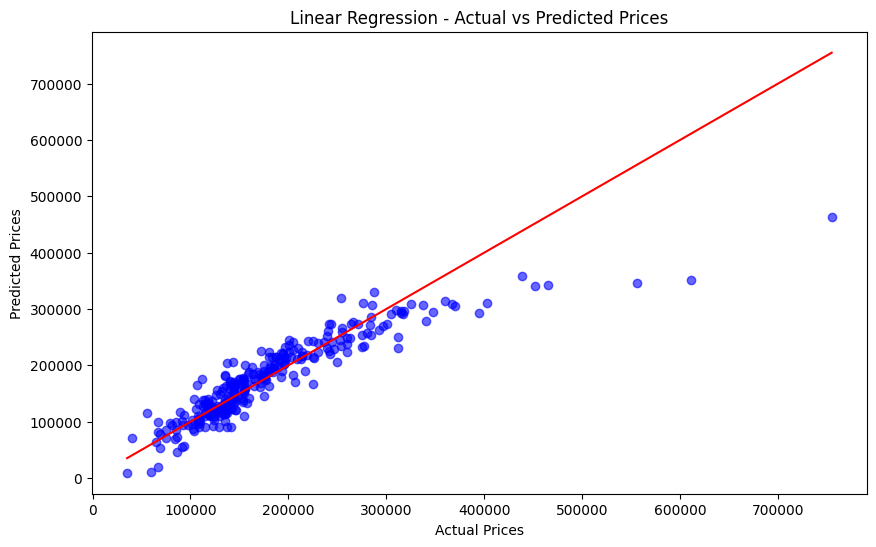

In [11]:
# Plotting the results for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.6, color='b')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression - Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()

In [12]:

# Generating Predictions for Submission

# Linear Regression Predictions
predictions_lin = lin_reg.predict(test_data)
submission_lin = pd.DataFrame({
    'Id': test_data.index + 1,  # Assuming the test data index + 1 represents the Id
    'SalePrice': predictions_lin
})
submission_lin.to_csv('linear_regression_submission.csv', index=False)

# Random Forest Predictions
predictions_rf = rf_reg.predict(test_data)
submission_rf = pd.DataFrame({
    'Id': test_data.index + 1,  # Assuming the test data index + 1 represents the Id
    'SalePrice': predictions_rf
})
submission_rf.to_csv('random_forest_submission.csv', index=False)

# XGBoost Predictions
predictions_xgb = xgb_reg.predict(test_data)
submission_xgb = pd.DataFrame({
    'Id': test_data.index + 1,  # Assuming the test data index + 1 represents the Id
    'SalePrice': predictions_xgb
})
submission_xgb.to_csv('xgboost_submission.csv', index=False)

In [13]:
# Best Fit Model on Test Data
test_X = test_data.copy()

# Fit Linear Regression on test data
lin_reg_test = LinearRegression()
lin_reg_test.fit(test_X, predictions_lin)
test_pred_lin = lin_reg_test.predict(test_X)

# Fit Random Forest on test data
rf_reg_test = RandomForestRegressor(n_estimators=500, random_state=42)
rf_reg_test.fit(test_X, predictions_rf)
test_pred_rf = rf_reg_test.predict(test_X)

# Fit XGBoost on test data
xgb_reg_test = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=1000)
xgb_reg_test.fit(test_X, predictions_xgb)
test_pred_xgb = xgb_reg_test.predict(test_X)

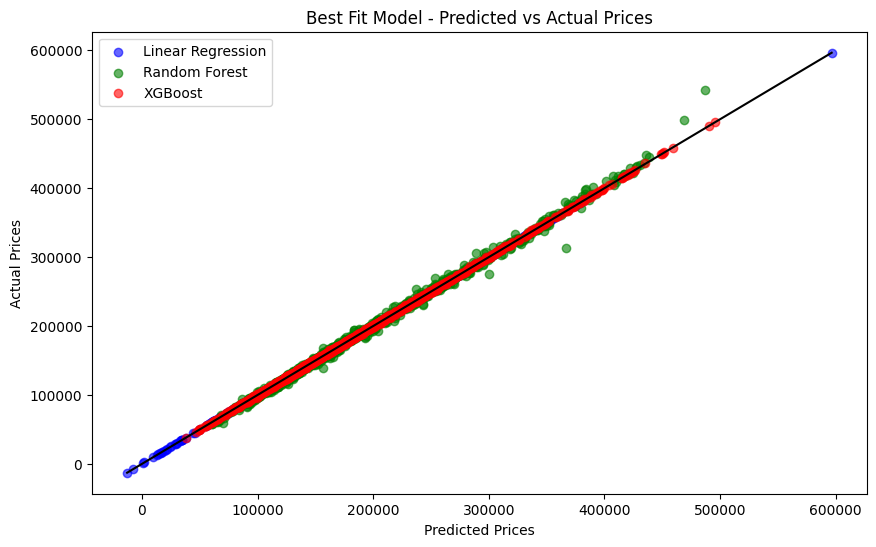

In [14]:
# Plotting the results for Best Fit Model on Test Data
plt.figure(figsize=(10, 6))
plt.scatter(test_pred_lin, predictions_lin, alpha=0.6, color='b', label='Linear Regression')
plt.scatter(test_pred_rf, predictions_rf, alpha=0.6, color='g', label='Random Forest')
plt.scatter(test_pred_xgb, predictions_xgb, alpha=0.6, color='r', label='XGBoost')
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Best Fit Model - Predicted vs Actual Prices")
plt.legend()
plt.plot([min(predictions_lin), max(predictions_lin)], [min(predictions_lin), max(predictions_lin)], color='black')  # Line of perfect prediction
plt.show()

In [15]:
# Create a DataFrame with predictions
submission = pd.DataFrame({
    'Id': test_data.index + 1,  # Assuming the test data index + 1 represents the Id
    'Linear_Regression': predictions_lin,
    'Random_Forest': predictions_rf,
    'XGBoost': predictions_xgb
})

# Save the DataFrame to a CSV file
submission.to_csv('final_submission.csv', index=False)